In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징을 두드러지게 한다.
from tensorflow.keras.layers import Conv2D
# MaxPooling : 불필요한 부분을 제거하는 역할을 한다
from tensorflow.keras.layers import MaxPool2D
# Flatten : CNN, MaxPooling은 2차원 데이터를 사용하고 출력하기 때문에
# 1차원 데이터로 변하는 것을 사용해야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 노드의 일부를 on/off 하면서 과적합을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 원핫 인코딩하고 차원축소를 한다.
from tensorflow.keras.layers import Embedding
# 문장 학습을 위한 RNN(LSTM)
from tensorflow.keras.layers import LSTM
# Cnn1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D


# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원한다.
from tensorflow.keras.models import load_model

# epoch 마다 저장을 하기 위해 사용한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단을 위해 사용한다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장의 데이터의 단어 데이터 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# seed 설정
np.random.seed(1)
tf.random.set_seed(1)


In [3]:
# 데이터를 불러온다.
df1 = pd.read_csv('data/naver_star_data.csv')
df1


,평점,평가글,작성자,작성날짜,공감수,비공감수
0,1.0,"B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷...",코꾸뇨우옹(pott****),2020.12.24 09:08,873.0,289.0
1,3.0,이딴 영화가 평점 8점 후반대라는 게 믿기지 않는다. 역시 네이버 평점은 믿고 걸러...,juum****,2020.12.23 22:19,620.0,232.0
2,6.0,역시 원더우먼 영화는 주연배우 갤가돗과 크리스파인이 다 살리네.. 감독은 확실히 영...,없음(jymi****),2020.12.23 17:05,480.0,168.0
3,2.0,진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ,민중의빠따(gkst****),2020.12.23 22:51,433.0,143.0
4,1.0,히어로물의 액션을 기대했음. 그러나 졸렬한 액션과 이상한 전개로 마지막 영화관을 나...,시리우스(sojh****),2020.12.23 13:34,412.0,198.0
...,...,...,...,...,...,...
260670,1.0,이렇게 높은평점 받을 영화는 아닌듯..딱7~8점초반영화,dbsgk(jsjh****),2015.02.18 15:25,5.0,12.0
260671,1.0,섹시마일드. 왜 이영화가 평점이 높은데. 그냥 그런영화면 재미없다고 하세요. 괜히 ...,heli****,2015.10.08 16:51,1.0,9.0
260672,1.0,영화 시작후 1분만에 욕이 나왔다.발연기 발연출 초저질영화의 대가다.XX!!!,appl****,2012.03.26 13:37,3.0,11.0
260673,1.0,먼가 오늘날의 뻔한 한국드라마로 보였다. 그리고 난 그것이 싫다.... 명작들은 세...,느와르(igel****),2017.01.01 00:31,0.0,10.0


In [4]:
# 평점과 평가글만 가져온다.
df2 = df1[['평점', '평가글']]
df2


,평점,평가글
0,1.0,"B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷..."
1,3.0,이딴 영화가 평점 8점 후반대라는 게 믿기지 않는다. 역시 네이버 평점은 믿고 걸러...
2,6.0,역시 원더우먼 영화는 주연배우 갤가돗과 크리스파인이 다 살리네.. 감독은 확실히 영...
3,2.0,진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ
4,1.0,히어로물의 액션을 기대했음. 그러나 졸렬한 액션과 이상한 전개로 마지막 영화관을 나...
...,...,...
260670,1.0,이렇게 높은평점 받을 영화는 아닌듯..딱7~8점초반영화
260671,1.0,섹시마일드. 왜 이영화가 평점이 높은데. 그냥 그런영화면 재미없다고 하세요. 괜히 ...
260672,1.0,영화 시작후 1분만에 욕이 나왔다.발연기 발연출 초저질영화의 대가다.XX!!!
260673,1.0,먼가 오늘날의 뻔한 한국드라마로 보였다. 그리고 난 그것이 싫다.... 명작들은 세...


In [5]:
# 정보확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260675 entries, 0 to 260674
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   평점      260675 non-null  float64
 1   평가글     253691 non-null  object 
dtypes: float64(1), object(1)
memory usage: 4.0+ MB


In [6]:
# 결측치 확인
df2.isna().sum()

평점        0
평가글    6984
dtype: int64

In [7]:
# 결측치를 제거한다. 
df2.dropna(inplace=True)
df2.isna().sum()

평점     0
평가글    0
dtype: int64

In [8]:
# 평가등급 컬럼 추가
df2['평점등급'] = 0

# 평점이 5점 이하는 0으로 바꿔주고 그렇지 않으면 1로 바꾸준다.
idx1 = df2.query('평점 <= 5').index
idx2 = df2.query('평점 > 5').index

df2.loc[idx1, '평점등급'] = 0
df2.loc[idx2, '평점등급'] = 1

df2['평점등급'].value_counts()


1    217358
0     36333
Name: 평점등급, dtype: int64

In [9]:
# 평점 컬럼 제거
df3 = df2.drop('평점',axis = 1)
df3

,평가글,평점등급
0,"B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷...",0
1,이딴 영화가 평점 8점 후반대라는 게 믿기지 않는다. 역시 네이버 평점은 믿고 걸러...,0
2,역시 원더우먼 영화는 주연배우 갤가돗과 크리스파인이 다 살리네.. 감독은 확실히 영...,1
3,진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ,0
4,히어로물의 액션을 기대했음. 그러나 졸렬한 액션과 이상한 전개로 마지막 영화관을 나...,0
...,...,...
260670,이렇게 높은평점 받을 영화는 아닌듯..딱7~8점초반영화,0
260671,섹시마일드. 왜 이영화가 평점이 높은데. 그냥 그런영화면 재미없다고 하세요. 괜히 ...,0
260672,영화 시작후 1분만에 욕이 나왔다.발연기 발연출 초저질영화의 대가다.XX!!!,0
260673,먼가 오늘날의 뻔한 한국드라마로 보였다. 그리고 난 그것이 싫다.... 명작들은 세...,0


In [10]:
# 평가글
docs = df3['평가글'].values
# 평가등급
classes = df3['평점등급'].values

# 예제 테스트용 데이터 줄이기
docs = docs[:1000]
classes = classes[:1000]


In [11]:
# 토큰화 함수를 통해 전처리를 한다.
token = Tokenizer()
token.fit_on_texts(docs)


In [12]:
# 각 문장을 토큰화 시킨 데이터를 단어 인덱스로 변환한다.
X = token.texts_to_sequences(docs)
X


[[250,
  1306,
  1307,
  64,
  1308,
  22,
  452,
  677,
  337,
  453,
  678,
  338,
  20,
  16,
  339,
  1309,
  12,
  32,
  162,
  679,
  1310],
 [454,
  16,
  48,
  455,
  1311,
  132,
  680,
  456,
  133,
  1312,
  681,
  457,
  1313,
  458,
  23,
  1314,
  459,
  1315,
  199,
  1316,
  1317,
  1318,
  1319,
  1320,
  1321,
  251,
  200,
  1322,
  201,
  1323],
 [133,
  4,
  24,
  1324,
  340,
  682,
  10,
  1325,
  252,
  253,
  2,
  39,
  1326,
  1327,
  1328,
  1329,
  2,
  1330,
  341,
  10,
  1331,
  4,
  254,
  342,
  683,
  1332,
  60,
  251],
 [3, 684, 460, 61, 1333, 1334, 343, 685, 202],
 [1335,
  255,
  1336,
  686,
  1337,
  134,
  461,
  687,
  82,
  688,
  1338,
  256,
  1339,
  18,
  344,
  20,
  14,
  18,
  344,
  689,
  18,
  344,
  1340,
  18,
  344,
  690,
  462,
  43,
  691,
  1341,
  1342,
  135],
 [692, 163, 1343, 1, 136, 1344],
 [345, 91, 463, 1345, 10, 346, 347, 1346, 1347, 257, 15, 1348, 1349, 258, 259],
 [17,
  464,
  1350,
  260,
  1,
  1351,
  1352,
  465

In [13]:
# 각 리스트에서 가장 단어가 많은 것의 단어수를 구한다.
max_count = 0

for x2 in X :
    # 현재 문장의 단어 수
    count1 = len(x2)
    
    # 현재 저장되어 있는 최대 단어 수보다 많으면 덮어씌운다.
    if max_count < count1 :
        max_count = count1
        
max_count


33

In [14]:
# 패딩작업
# 단어수가 다른 문장들의 수를 똑같이 맞춘다.
padded_x = pad_sequences(X, max_count)
padded_x


array([[   0,    0,    0, ...,  162,  679, 1310],
       [   0,    0,    0, ..., 1322,  201, 1323],
       [   0,    0,    0, ..., 1332,   60,  251],
       ...,
       [   0,    0,    0, ...,   32,   58, 6339],
       [   0,    0,  895, ..., 6350, 6351, 6352],
       [   0,    0,    0, ..., 6357,  664, 6358]])

In [15]:
# 단어의 개수를 구한다.
word_size = len(token.word_index) + 1
word_size


6359

In [16]:
# 모델 설정
model = Sequential()

# 문장의 데이터를 100개로 압축한다.
model.add(Embedding(word_size, 100))
model.add(Dropout(0.5))

# CNN
model.add(Conv1D(64, kernel_size=3))
model.add(Activation('relu'))

model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))

# RNN(LSTM) -> 위에서 100으로 압축했기 때문에 노드의 수는
# 100을 설정한다.
model.add(LSTM(100))
model.add(Activation('tanh'))

# 출력층 -> 결과데이터의 종류가 0 or 1
model.add(Dense(1))
model.add(Activation('sigmoid')) 


In [17]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/27/{epoch}-{val_loss}.h5'
path2 = 'model/27/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience : 개선이 된 이후 몇 번을 더 볼 것인가를 설정한다.
# 이 횟수 동안 개선이 되지 않으면 중단 시킨다.
call3 = EarlyStopping(monitor='val_loss', patience=50)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(padded_x, classes, 
                                                   test_size=0.2,
                                                   random_state=1)


In [19]:
# 학습 모델을 생성한다.
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [20]:
# 학습한다.
with tf.device('/CPU:0') :
    history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          validation_data=[X_test, y_test],
          callbacks=[call1, call2, call3])


Epoch 1/2000
2/2 [==============================] - 2s 478ms/step - loss: 0.6836 - accuracy: 0.7100 - val_loss: 0.6653 - val_accuracy: 0.7350
Epoch 2/2000
2/2 [==============================] - 0s 150ms/step - loss: 0.6467 - accuracy: 0.7513 - val_loss: 0.6331 - val_accuracy: 0.7350
Epoch 3/2000
2/2 [==============================] - 0s 151ms/step - loss: 0.6022 - accuracy: 0.7513 - val_loss: 0.5947 - val_accuracy: 0.7350
Epoch 4/2000
2/2 [==============================] - 0s 157ms/step - loss: 0.5609 - accuracy: 0.7513 - val_loss: 0.5851 - val_accuracy: 0.7350
Epoch 5/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.5707 - accuracy: 0.7513 - val_loss: 0.5911 - val_accuracy: 0.7350
Epoch 6/2000
2/2 [==============================] - 0s 158ms/step - loss: 0.5669 - accuracy: 0.7513 - val_loss: 0.5799 - val_accuracy: 0.7350
Epoch 7/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.5515 - accuracy: 0.7513 - val_loss: 0.5806 - val_accuracy: 0.7350
Epoch 8/

2/2 [==============================] - 0s 81ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.8023 - val_accuracy: 0.7100
Epoch 59/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.8062 - val_accuracy: 0.7200
Epoch 60/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.0125 - accuracy: 0.9950 - val_loss: 0.8225 - val_accuracy: 0.7150
Epoch 61/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.8403 - val_accuracy: 0.7150
Epoch 62/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.0095 - accuracy: 0.9962 - val_loss: 0.8583 - val_accuracy: 0.7150
Epoch 63/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.8717 - val_accuracy: 0.7200
Epoch 64/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.8781 - val_accuracy: 0.7200
Epoch 65/2000
2/2 [=

In [21]:
# 모델을 복원한다.
model2 = load_model(path2)
model2


In [22]:
with tf.device('/CPU:0') :
    a1 = model2.evaluate(X_test, y_test)
    print(f'손실률 : {a1[0]}')
    print(f'정확도 : {a1[1]}')


7/7 [==============================] - 0s 6ms/step - loss: 0.5132 - accuracy: 0.7600
손실률 : 0.513217031955719
정확도 : 0.7599999904632568


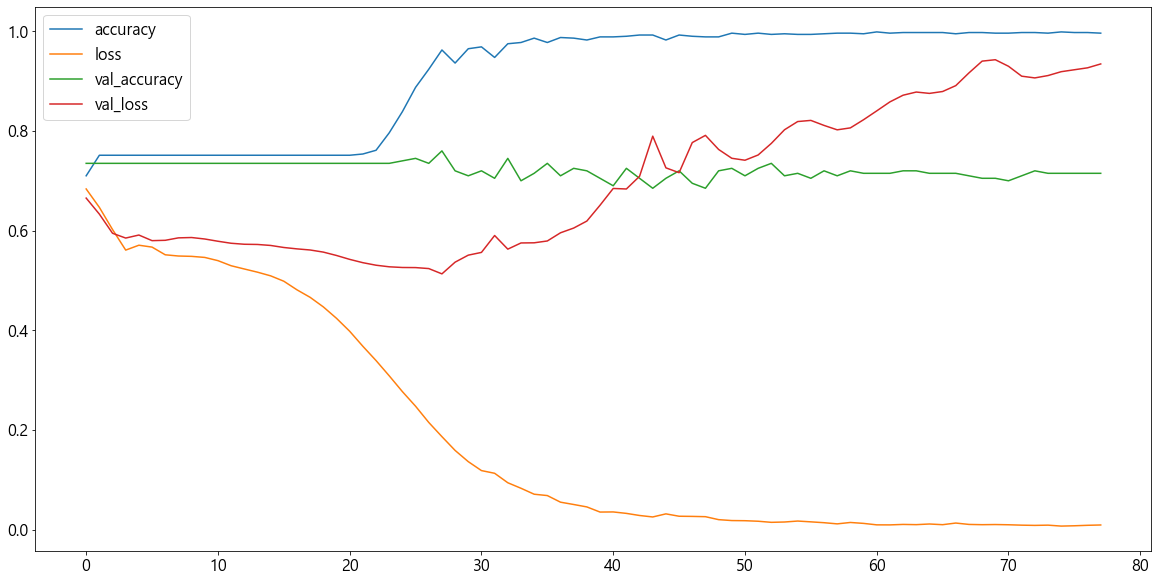

In [23]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
